---------------------------

# Title : SERN Contour Prediction Using Neural Network
### Author : Neelay Doshi

---------------------------

### Introduction :

We will be using neural-newtwork to predict the nozzle contour in the following two projects:
1. We will first see if an neural-network can be trained to fit the the contour of a single nozzle geometry wherein the input features is simply the x-coordinate (`x`) and the desired output prediction is its y-coordinate (`y`). 
2. Next, we will see if we can extend this to predict the nozzle contour of any nozzle given the input variables x-coordinate (`x`), inlet Mach number (`M_0`) and exit Mach number (`M_e`). The model will be tested upon a seperate validation dataset.

---------------------------

# 1. Curve Fitting for Single Nozzle


In [1]:
#################
# Note : 
#################
# I have saved my dataset on drive and am thus navigating to the appropriate
# directory by accessing my drive.  
# Incase you are running this file locally, then you needn't access your drive 
# and can change the path to your dataset accordingly.
# If you are using googlecolab (as I am), you may upload the dataset to your
# drive and change the navigation path accordingly.
#################

#################
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

#################
# navigate to directory containing dataset
%cd '/content/drive/MyDrive/AI/Nly_Proj/data'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AI/Nly_Proj/data


In [2]:
#################
import pandas as pd

#################
# importing single nozzle profile from the training dataset
inx       = 5 # (inx <= 209) # index of the nozzle we wish to use from the training dataset
df_train  = pd.read_csv('nozzle_train.csv')
X_train   = df_train['x'].loc[ 50*inx : 50*inx + 49 ]
y_train   = df_train['y'].loc[ 50*inx : 50*inx + 49 ]

#################
# normalization
mu      = X_train.mean() # mean
sigma   = X_train.std() # standard deviation
y_max   = y_train.max() # maximum value of "y"

X_train = (X_train-mu)/sigma # mean-normalization
y_train = y_train/y_max # scaling "y" to range [0, 1]


In [3]:
#################
# printing 
print('#'*27)
print('x_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('#'*27)
print(X_train.head())
print('#'*27)
print(y_train.head())
print('#'*27)

###########################
x_train shape =  (50,)
y_train shape =  (50,)
###########################
250   -1.199396
251   -1.175452
252   -1.150700
253   -1.125097
254   -1.098613
Name: x, dtype: float64
###########################
250    0.000000
251    0.020231
252    0.040462
253    0.060694
254    0.083815
Name: y, dtype: float64
###########################


Minimum loss: 0.003331526881083846


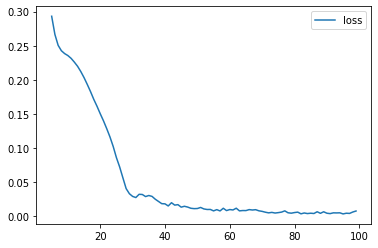

In [4]:
#################
from tensorflow import keras
from keras import layers

#################
features = [1]

#################
# creating neural-network
#################
model = keras.Sequential([
          layers.Dense(units=64, activation='relu', input_shape=features),
          layers.Dense(units=64, activation='relu'),
          layers.Dense(units=1, activation='linear'), 
])


#################
# initializing model "loss" and "optimizer"
# "mae" seems to works better than "mse" 
model.compile(loss='mae', optimizer="adam")

#################
# training model
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    verbose=0 
    )

#################
# plotting "loss" function 
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot();
print("Minimum loss: {}".format(history_df['loss'].min()))


(-1.18598, 24.90558, -0.17300000000000001, 3.633)

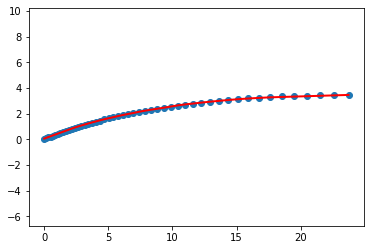

In [5]:
#################
import matplotlib.pyplot as plt

#################
# predict the "y" coordinate using the trained model  
y_pred  = model.predict(X_train)
y_pred  = y_pred*y_max # scale it back to original size

#################
# get the original (x, y) coordinates from training dataset
x_org   = df_train['x'].loc[ 50*inx : 50*inx + 49 ]
y_org   = df_train['y'].loc[ 50*inx : 50*inx + 49 ]

#################
# display comparison between predicted and actual nozzle contour
plt.scatter(x_org, y_org)
plt.plot(x_org, y_pred, 'r', linewidth=2)
plt.axis('equal')


# 2. Curve Fitting for Multiple Nozzles


In [6]:
#################
# Note : 
#################
# I have saved my dataset on drive and am thus navigating to the appropriate
# directory by accessing my drive.  
# Incase you are running this file locally, then you needn't access your drive 
# and can change the path to your dataset accordingly.
# If you are using googlecolab (as I am), you may upload the dataset to your
# drive and change the navigation path accordingly.
#################

#################
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

#################
# navigate to directory containing dataset
%cd '/content/drive/MyDrive/AI/Nly_Proj/data'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AI/Nly_Proj/data


In [7]:
#################
import pandas as pd
from sklearn.utils import shuffle

#################
# importing training dataset
df_train  = pd.read_csv('nozzle_train.csv')
X_train   = df_train.drop('y', axis=1)
y_train   = df_train['y']

#################
print('#'*27)
print('x_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('#'*27)

###########################
x_train shape =  (10500, 3)
y_train shape =  (10500,)
###########################


In [8]:
#################
# normalization of dataset
mu      = X_train.mean()
sigma   = X_train.std()
y_max   = y_train.max()

X_train = (X_train-mu)/sigma # mean-normalization
y_train = y_train/y_max # scaling to range [0, 1]

#################
# printing
print('#'*27)
print(X_train.head())
print('#'*27)
print(y_train.head())
print('#'*27)

###########################
          x        M0        Me
0 -0.815312 -1.566624 -1.651367
1 -0.807340 -1.566624 -1.651367
2 -0.799180 -1.566624 -1.651367
3 -0.790827 -1.566624 -1.651367
4 -0.782259 -1.566624 -1.651367
###########################
0    0.000000
1    0.002186
2    0.004372
3    0.006557
4    0.008743
Name: y, dtype: float64
###########################


Minimum loss: 7.141318292269716e-07


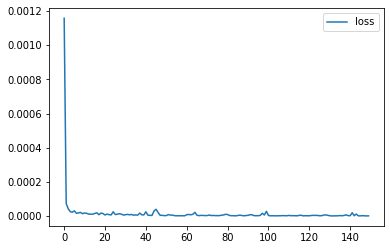

In [9]:
#################
from keras import layers
from tensorflow import keras

#################
# number of input features
features = [X_train.shape[1]]

#################
# creating neural-network
# compare "relu" and "leaky_relu" for activation-function
activation = 'relu'
model = keras.Sequential([
          layers.Dense(units=128, activation=activation, input_shape=features),
          layers.Dense(units=128, activation=activation),
          layers.Dense(units=64, activation=activation),
          layers.Dense(units=1, activation='linear'), 
])


#################
# initializing model "loss" and "optimizer"
# compare "mse" and "mae" for loss-function
model.compile(loss='mse', optimizer="adam")

#################
# training model
history = model.fit(
    X_train, y_train, 
    batch_size = 100,
    epochs=150, 
    shuffle=True,
    verbose=0 
    )

#################
# plotting "loss" function 
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot();
print("Minimum loss: {}".format(history_df['loss'].min()))


In [10]:
#################
# importing validation dataset
df_valid  = pd.read_csv('nozzle_test.csv')
X_valid   = df_valid.drop('y', axis=1)
y_valid   = df_valid['y']

#################
# normalization
X_valid = (X_valid-mu)/sigma # mean-normalization
y_valid = y_valid/y_max # scaling to range [0, 1]

#################
print('#'*27)
print('x_valid shape = ', X_valid.shape)
print('y_valid shape = ', y_valid.shape)
print('#'*27)

###########################
x_valid shape =  (2500, 3)
y_valid shape =  (2500,)
###########################


(-1.6220949999999998, 34.063995, -0.21844544762745502, 4.358021211791784)

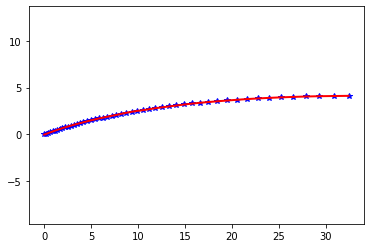

In [11]:
#################
import matplotlib.pyplot as plt

#################
# Compute the predicted output 
inx     = 25 # (inx < 49)

X_inx   = X_valid.loc[ 50*inx : 50*inx+49, : ] # normalized
x_inx   = df_valid['x'].loc[ 50*inx : 50*inx+49 ]
y_inx   = df_valid['y'].loc[ 50*inx : 50*inx+49 ]
y_pred  = model.predict(X_inx) * y_max


#################
# Display the result
plt.plot(x_inx, y_inx, '*b')
plt.plot(x_inx, y_pred, 'r', linewidth=2)
plt.axis('equal')


---------------------------
# Conclusion 
---------------------------

* The neural-network can easily predict the curve for a single nozzle.
* For multiple nozzle it is able to predict well for large nozzles, but not so for smaller nozzles. 
* Further modification in the neural-network could lead to better prediction for multiple nozzles as well. 
* Once an apporpriate model is found and trained, the forward-propogation step of neural-network can run and predict the nozzle profile much faster than MoC code ([here](https://github.com/neelaydoshi/nozzle-design-using-MoC)) and thus save time.
*The great benifit of using neural-network over linear-regression is that we do not need to hypothesize with various other complex input features as was done in my previous project ([here](https://github.com/neelaydoshi/nozzle-contour-prediction-using-linear-regression)).

---------------------------